In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


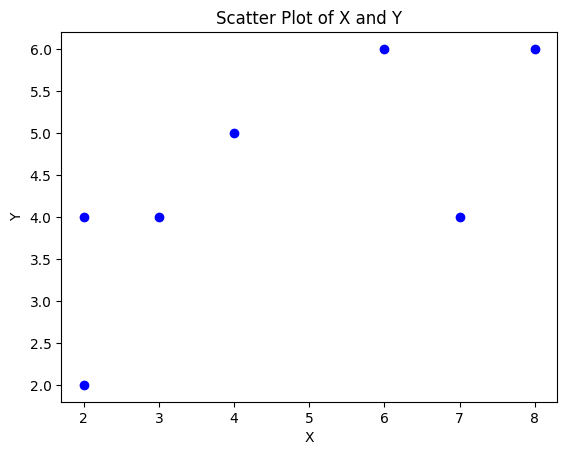

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('dataset/Agustus-senin.csv')

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan grid
# plt.grid(True)

# Menampilkan plot
plt.show()

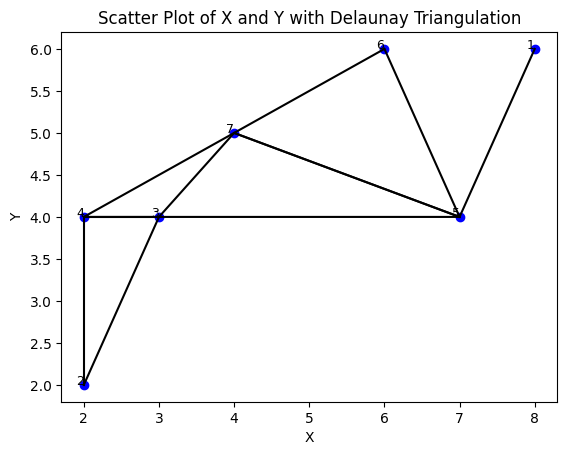

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Membaca data dari file CSV
df = pd.read_csv('dataset/Agustus-senin.csv')

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Menggambar triangulation
for simplex in tri.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot of X and Y with Delaunay Triangulation')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()


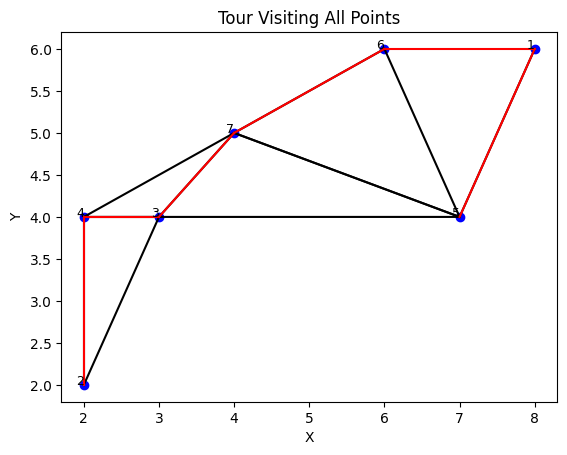

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import numpy as np
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

# Membaca data dari file CSV
df = pd.read_csv('dataset/Agustus-senin.csv')

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Menggambar triangulation
for simplex in tri.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Menghitung matriks jarak antar titik
dist_matrix = distance_matrix(points, points)

# Membuat minimum spanning tree (MST)
mst = minimum_spanning_tree(dist_matrix)

# Menggambar jalur yang mengunjungi semua titik berdasarkan MST
edges = np.array(np.where(mst.toarray() != 0)).T
for edge in edges:
    p1 = points[edge[0]]
    p2 = points[edge[1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')

# Menambahkan judul dan label sumbu
plt.title('Tour Visiting All Points')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()


In [19]:
import pandas as pd
import numpy as np
import math
from heapq import heappop, heappush

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def a_star(start, goal, graph):
    open_list = []
    heappush(open_list, (0, start))  # (f-score, node)
    
    g_score = {start: 0}
    f_score = {start: euclidean_distance(start, goal)}
    
    came_from = {}
    
    while open_list:
        current_f, current_node = heappop(open_list)
        
        if current_node == goal:
            # If reached the goal, return the path
            path = []
            total_distance = g_score[current_node]
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path, total_distance, f_score[goal] - total_distance
        
        for neighbor in graph[current_node]:
            tentative_g_score = g_score[current_node] + euclidean_distance(current_node, neighbor)
            
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current_node
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                heappush(open_list, (f_score[neighbor], neighbor))
    
    return None, None, None  # If no path found

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Initialize the graph
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])
    neighbors = []
    for idx, r in df.iterrows():
        if (r['X'], r['Y']) != node:
            neighbors.append((r['X'], r['Y']))
    graph[node] = neighbors

# The starting and ending points
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])
end_point = (df.iloc[-1]['X'], df.iloc[-1]['Y'])

# Use the A* algorithm to find the shortest path
total_distance_traveled = 0
current_point = start_point
for i in range(len(df) - 1):
    next_point = (df.iloc[i]['X'], df.iloc[i]['Y'])
    next_next_point = (df.iloc[i+1]['X'], df.iloc[i+1]['Y'])
    distance = euclidean_distance(current_point, next_point)
    total_distance_traveled += distance
    print(f"\nDistance {i+1}: {current_point} to {next_point} = {distance} units")
    print(f"Total current distance: {total_distance_traveled} units")
    print(f"Distance to be traveled: {euclidean_distance(next_point, next_next_point)} units")
    current_point = next_point

print("\nTotal distance traveled:", total_distance_traveled, "units")



Distance 1: (8, 6) to (8, 6) = 0.0 units
Total current distance: 0.0 units
Distance to be traveled: 7.211102550927978 units

Distance 2: (8, 6) to (2, 2) = 7.211102550927978 units
Total current distance: 7.211102550927978 units
Distance to be traveled: 2.23606797749979 units

Distance 3: (2, 2) to (3, 4) = 2.23606797749979 units
Total current distance: 9.447170528427769 units
Distance to be traveled: 1.0 units

Distance 4: (3, 4) to (2, 4) = 1.0 units
Total current distance: 10.447170528427769 units
Distance to be traveled: 5.0 units

Distance 5: (2, 4) to (7, 4) = 5.0 units
Total current distance: 15.447170528427769 units
Distance to be traveled: 2.23606797749979 units

Distance 6: (7, 4) to (6, 6) = 2.23606797749979 units
Total current distance: 17.68323850592756 units
Distance to be traveled: 2.23606797749979 units

Total distance traveled: 17.68323850592756 units



Distance 1: (8, 6) to (8, 6) = 0.0 units
Total current distance: 0.0 units
Distance to be traveled: 7.211102550927978 units

Distance 2: (8, 6) to (2, 2) = 7.211102550927978 units
Total current distance: 7.211102550927978 units
Distance to be traveled: 2.23606797749979 units

Distance 3: (2, 2) to (3, 4) = 2.23606797749979 units
Total current distance: 9.447170528427769 units
Distance to be traveled: 1.0 units

Distance 4: (3, 4) to (2, 4) = 1.0 units
Total current distance: 10.447170528427769 units
Distance to be traveled: 5.0 units

Distance 5: (2, 4) to (7, 4) = 5.0 units
Total current distance: 15.447170528427769 units
Distance to be traveled: 2.23606797749979 units

Distance 6: (7, 4) to (6, 6) = 2.23606797749979 units
Total current distance: 17.68323850592756 units
Distance to be traveled: 2.23606797749979 units

Total distance traveled: 17.68323850592756 units


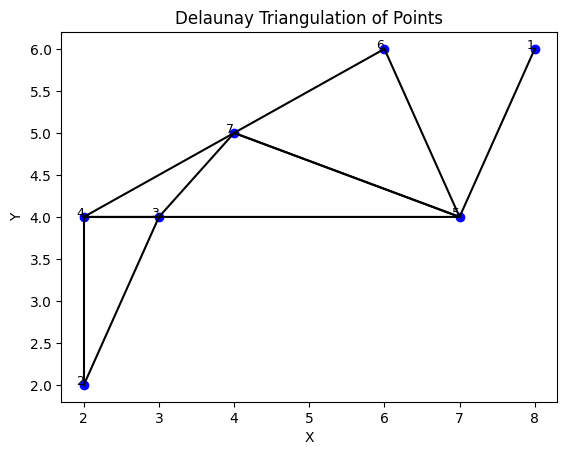

In [21]:
import pandas as pd
import numpy as np
import math
from heapq import heappop, heappush
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial import distance_matrix

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def a_star(start, goal, graph):
    open_list = []
    heappush(open_list, (0, start))  # (f-score, node)
    
    g_score = {start: 0}
    f_score = {start: euclidean_distance(start, goal)}
    
    came_from = {}
    
    while open_list:
        current_f, current_node = heappop(open_list)
        
        if current_node == goal:
            # If reached the goal, return the path
            path = []
            total_distance = g_score[current_node]
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path, total_distance, f_score[goal] - total_distance
        
        for neighbor in graph[current_node]:
            tentative_g_score = g_score[current_node] + euclidean_distance(current_node, neighbor)
            
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current_node
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                heappush(open_list, (f_score[neighbor], neighbor))
    
    return None, None, None  # If no path found

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Initialize the graph
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])
    neighbors = []
    for idx, r in df.iterrows():
        if (r['X'], r['Y']) != node:
            neighbors.append((r['X'], r['Y']))
    graph[node] = neighbors

# The starting and ending points
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])
end_point = (df.iloc[-1]['X'], df.iloc[-1]['Y'])

# Use the A* algorithm to find the shortest path
total_distance_traveled = 0
current_point = start_point
for i in range(len(df) - 1):
    next_point = (df.iloc[i]['X'], df.iloc[i]['Y'])
    next_next_point = (df.iloc[i+1]['X'], df.iloc[i+1]['Y'])
    distance = euclidean_distance(current_point, next_point)
    total_distance_traveled += distance
    print(f"\nDistance {i+1}: {current_point} to {next_point} = {distance} units")
    print(f"Total current distance: {total_distance_traveled} units")
    print(f"Distance to be traveled: {euclidean_distance(next_point, next_next_point)} units")
    current_point = next_point

print("\nTotal distance traveled:", total_distance_traveled, "units")

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Menggambar triangulation
for simplex in tri.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Menambahkan judul dan label sumbu
plt.title('Delaunay Triangulation of Points')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()


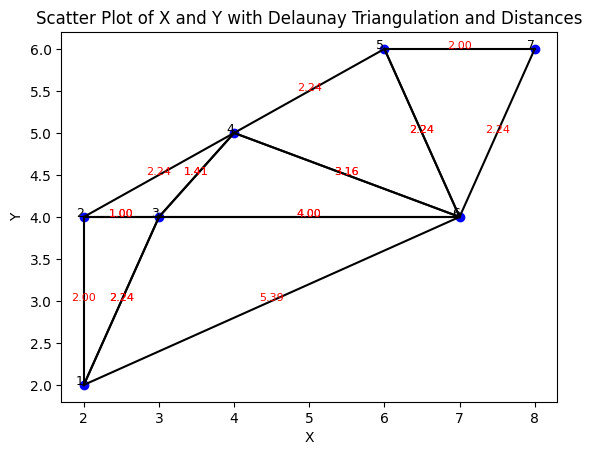

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import numpy as np

# Membaca data dari file CSV
df = pd.read_csv('dataset/Agustus-senin.csv')

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Menggambar triangulation dengan label jarak
for simplex in tri.simplices:
    point1 = points[simplex[0]]
    point2 = points[simplex[1]]
    point3 = points[simplex[2]]
    
    # Menggambar garis
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k-')
    plt.plot([point2[0], point3[0]], [point2[1], point3[1]], 'k-')
    plt.plot([point3[0], point1[0]], [point3[1], point1[1]], 'k-')
    
    # Menghitung dan menambahkan jarak pada garis
    def add_distance_label(p1, p2):
        distance = np.linalg.norm(p1 - p2)
        midpoint = (p1 + p2) / 2
        plt.text(midpoint[0], midpoint[1], f'{distance:.2f}', color='red', fontsize=8, ha='center')

    add_distance_label(point1, point2)
    add_distance_label(point2, point3)
    add_distance_label(point3, point1)

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot of X and Y with Delaunay Triangulation and Distances')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()



Distance 1: (2, 2) to (2, 2) = 0.0 units
Total current distance: 0.0 units
Distance to be traveled: 2.0 units

Distance 2: (2, 2) to (2, 4) = 2.0 units
Total current distance: 2.0 units
Distance to be traveled: 1.0 units

Distance 3: (2, 4) to (3, 4) = 1.0 units
Total current distance: 3.0 units
Distance to be traveled: 1.4142135623730951 units

Distance 4: (3, 4) to (4, 5) = 1.4142135623730951 units
Total current distance: 4.414213562373095 units
Distance to be traveled: 2.23606797749979 units

Distance 5: (4, 5) to (6, 6) = 2.23606797749979 units
Total current distance: 6.650281539872885 units
Distance to be traveled: 2.23606797749979 units

Distance 6: (6, 6) to (7, 4) = 2.23606797749979 units
Total current distance: 8.886349517372675 units
Distance to be traveled: 2.23606797749979 units

Total distance traveled: 8.886349517372675 units


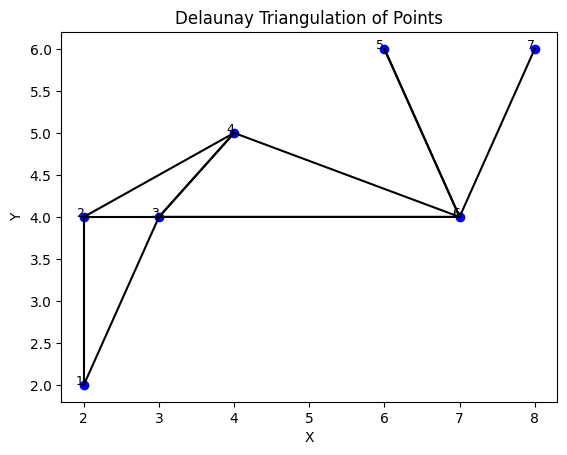

In [48]:
import pandas as pd
import numpy as np
import math
from heapq import heappop, heappush
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial import distance_matrix

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def a_star(start, goal, graph):
    open_list = []
    heappush(open_list, (0, start))  # (f-score, node)
    
    g_score = {start: 0}
    f_score = {start: euclidean_distance(start, goal)}
    
    came_from = {}
    
    while open_list:
        current_f, current_node = heappop(open_list)
        
        if current_node == goal:
            # If reached the goal, return the path
            path = []
            total_distance = g_score[current_node]
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path, total_distance, f_score[goal] - total_distance
        
        for neighbor in graph[current_node]:
            tentative_g_score = g_score[current_node] + euclidean_distance(current_node, neighbor)
            
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current_node
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                heappush(open_list, (f_score[neighbor], neighbor))
    
    return None, None, None  # If no path found

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Initialize the graph
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])
    neighbors = []
    for idx, r in df.iterrows():
        if (r['X'], r['Y']) != node:
            neighbors.append((r['X'], r['Y']))
    graph[node] = neighbors

# The starting and ending points
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])
end_point = (df.iloc[-1]['X'], df.iloc[-1]['Y'])

# Use the A* algorithm to find the shortest path
total_distance_traveled = 0
current_point = start_point
for i in range(len(df) - 1):
    next_point = (df.iloc[i]['X'], df.iloc[i]['Y'])
    next_next_point = (df.iloc[i+1]['X'], df.iloc[i+1]['Y'])
    distance = euclidean_distance(current_point, next_point)
    total_distance_traveled += distance
    print(f"\nDistance {i+1}: {current_point} to {next_point} = {distance} units")
    print(f"Total current distance: {total_distance_traveled} units")
    print(f"Distance to be traveled: {euclidean_distance(next_point, next_next_point)} units")
    current_point = next_point

print("\nTotal distance traveled:", total_distance_traveled, "units")

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Menggambar triangulation
for simplex in tri.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Menambahkan judul dan label sumbu
plt.title('Delaunay Triangulation of Points')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()


Total distance needed to travel to extinguish all points: 36.07326211449112 units
Path to point (2, 4):
Path: [(2, 2), (2, 4)]
Distance: 2.0

Path to point (3, 4):
Path: [(2, 2), (2, 4), (3, 4)]
Distance: 3.0

Path to point (4, 5):
Path: [(2, 2), (2, 4), (3, 4), (4, 5)]
Distance: 4.414213562373095

Path to point (6, 6):
Path: [(2, 2), (2, 4), (3, 4), (4, 5), (6, 6)]
Distance: 6.650281539872885

Path to point (7, 4):
Path: [(2, 2), (2, 4), (3, 4), (4, 5), (6, 6), (7, 4)]
Distance: 8.886349517372675

Path to point (8, 6):
Path: [(2, 2), (2, 4), (3, 4), (4, 5), (6, 6), (7, 4), (8, 6)]
Distance: 11.122417494872465



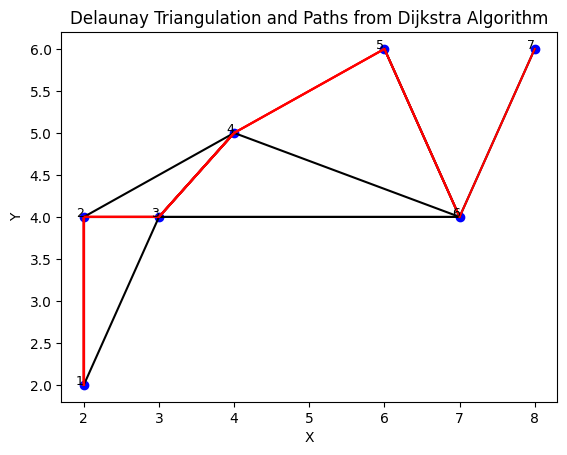

In [52]:
import pandas as pd
import math
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def dijkstra_sequential(start, graph, nodes):
    open_list = set(graph.keys())
    
    g_score = {node: float('inf') for node in open_list}
    g_score[start] = 0
    
    came_from = {}
    
    current_node = start
    for node in nodes:
        if node == start:
            continue
        tentative_g_score = g_score[current_node] + euclidean_distance(current_node, node)
        if tentative_g_score < g_score[node]:
            came_from[node] = current_node
            g_score[node] = tentative_g_score
        current_node = node
    
    return came_from, g_score

def print_path_to_node(node, came_from, g_score):
    path = []
    while node in came_from:
        path.append(node)
        node = came_from[node]
    path.append(node)
    path.reverse()
    print("Path:", path)
    print("Distance:", g_score[path[-1]])

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Inisialisasi graf
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])
    neighbors = []
    for idx, simplex in enumerate(tri.simplices):
        if tuple(points[simplex[0]]) != node:
            neighbors.append(tuple(points[simplex[0]]))
        if tuple(points[simplex[1]]) != node:
            neighbors.append(tuple(points[simplex[1]]))
        if tuple(points[simplex[2]]) != node:
            neighbors.append(tuple(points[simplex[2]]))
    graph[node] = neighbors

# Titik awal dimulai dari baris pertama dalam dataset
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])

# Mendapatkan list node yang akan diekspansi
nodes_to_expand = list(graph.keys())
nodes_to_expand.remove(start_point)

# Gunakan algoritma Dijkstra untuk mencari jalur terpendek ke setiap titik dari titik awal
came_from, g_score = dijkstra_sequential(start_point, graph, nodes_to_expand)

# Hitung total jarak yang ditempuh untuk memadamkan semua titik
total_distance_traveled = sum(g_score.values())

print("Total distance needed to travel to extinguish all points:", total_distance_traveled, "units")

# Cetak jalur yang dilalui dan jaraknya untuk setiap titik
for node in nodes_to_expand:
    print(f"Path to point {node}:")
    print_path_to_node(node, came_from, g_score)
    print()

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Menggambar Delaunay triangulation
for simplex in tri.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Menggambar jalur yang dilalui
for node in nodes_to_expand:
    path = [node]
    while node in came_from:
        path.append(node)
        node = came_from[node]
    path.append(start_point)
    path.reverse()
    path_points = np.array(path)
    plt.plot(path_points[:, 0], path_points[:, 1], 'r-')

# Menambahkan judul dan label sumbu
plt.title('Delaunay Triangulation and Paths from Dijkstra Algorithm')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()


Total distance needed to travel to extinguish all points: 36.07326211449112 units
Path to point (2, 4):
Path: [(2, 2), (2, 4)]
Distance: 2.0

Path to point (3, 4):
Path: [(2, 2), (2, 4), (3, 4)]
Distance: 3.0

Path to point (4, 5):
Path: [(2, 2), (2, 4), (3, 4), (4, 5)]
Distance: 4.414213562373095

Path to point (6, 6):
Path: [(2, 2), (2, 4), (3, 4), (4, 5), (6, 6)]
Distance: 6.650281539872885

Path to point (7, 4):
Path: [(2, 2), (2, 4), (3, 4), (4, 5), (6, 6), (7, 4)]
Distance: 8.886349517372675

Path to point (8, 6):
Path: [(2, 2), (2, 4), (3, 4), (4, 5), (6, 6), (7, 4), (8, 6)]
Distance: 11.122417494872465



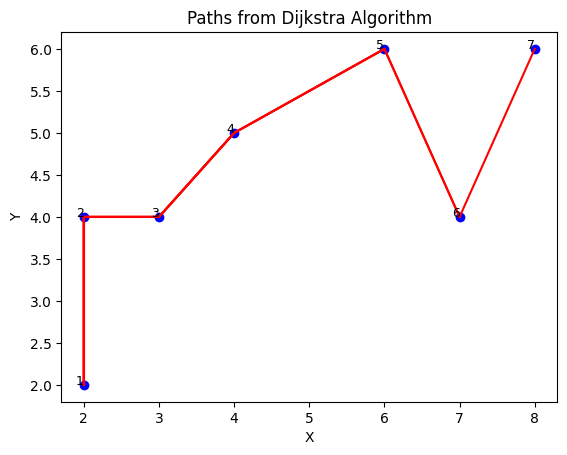

In [46]:
import pandas as pd
import math
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def dijkstra_sequential(start, graph, nodes):
    open_list = set(graph.keys())
    
    g_score = {node: float('inf') for node in open_list}
    g_score[start] = 0
    
    came_from = {}
    
    current_node = start
    for node in nodes:
        if node == start:
            continue
        tentative_g_score = g_score[current_node] + euclidean_distance(current_node, node)
        if tentative_g_score < g_score[node]:
            came_from[node] = current_node
            g_score[node] = tentative_g_score
        current_node = node
    
    return came_from, g_score

def print_path_to_node(node, came_from, g_score):
    path = []
    while node in came_from:
        path.append(node)
        node = came_from[node]
    path.append(node)
    path.reverse()
    print("Path:", path)
    print("Distance:", g_score[path[-1]])

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Inisialisasi graf
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])
    neighbors = []
    for idx, simplex in enumerate(tri.simplices):
        if tuple(points[simplex[0]]) != node:
            neighbors.append(tuple(points[simplex[0]]))
        if tuple(points[simplex[1]]) != node:
            neighbors.append(tuple(points[simplex[1]]))
        if tuple(points[simplex[2]]) != node:
            neighbors.append(tuple(points[simplex[2]]))
    graph[node] = neighbors

# Titik awal dimulai dari baris pertama dalam dataset
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])

# Mendapatkan list node yang akan diekspansi
nodes_to_expand = list(graph.keys())
nodes_to_expand.remove(start_point)

# Gunakan algoritma Dijkstra untuk mencari jalur terpendek ke setiap titik dari titik awal
came_from, g_score = dijkstra_sequential(start_point, graph, nodes_to_expand)

# Hitung total jarak yang ditempuh untuk memadamkan semua titik
total_distance_traveled = sum(g_score.values())

print("Total distance needed to travel to extinguish all points:", total_distance_traveled, "units")

# Cetak jalur yang dilalui dan jaraknya untuk setiap titik
for node in nodes_to_expand:
    print(f"Path to point {node}:")
    print_path_to_node(node, came_from, g_score)
    print()

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Menggambar jalur yang dilalui
for node in nodes_to_expand:
    path = [node]
    while node in came_from:
        path.append(node)
        node = came_from[node]
    path.append(start_point)
    path.reverse()
    path_points = np.array(path)
    plt.plot(path_points[:, 0], path_points[:, 1], 'r-')

# Menambahkan judul dan label sumbu
plt.title('Paths from Dijkstra Algorithm')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()


In [56]:
import pandas as pd
import math
from heapq import heappop, heappush
import math

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)


def reconstruct_path(came_from, start, goal, meeting_point):
    path = []
    # Reconstruct the path from start to meeting_point
    current_node = meeting_point
    while current_node != start and current_node is not None:
        path.append(current_node)
        current_node = came_from[current_node]
    path.append(start)
    path.reverse()
    
    # Reconstruct the path from meeting_point to goal
    current_node = meeting_point
    while current_node != goal and current_node is not None:
        path.append(current_node)
        current_node = came_from[current_node]
    path.append(goal)
    
    return path


def bidirectional_search_once(start, goal, graph):
    open_list_start = []
    open_list_goal = []
    heappush(open_list_start, (0, start))
    heappush(open_list_goal, (0, goal))
    
    g_score_start = {start: 0}
    g_score_goal = {goal: 0}
    
    came_from_start = {start: None}
    came_from_goal = {goal: None}
    
    visited = set()  # Set to keep track of visited nodes
    
    meeting_point = None
    
    while open_list_start and open_list_goal:
        current_f_start, current_node_start = heappop(open_list_start)
        current_f_goal, current_node_goal = heappop(open_list_goal)
        
        # Check if either search has reached the other's frontier
        if meeting_point:
            path = reconstruct_path(came_from_start, start, goal, meeting_point)
            path.extend(reconstruct_path(came_from_goal, goal, start, meeting_point))
            total_distance = g_score_start[meeting_point] + g_score_goal[meeting_point]
            return path, total_distance
        
        # Explore neighbors of the starting point's frontier
        for neighbor in graph[current_node_start]:
            if neighbor not in visited:
                tentative_g_score = g_score_start[current_node_start] + euclidean_distance(current_node_start, neighbor)
                if neighbor not in g_score_start or tentative_g_score < g_score_start[neighbor]:
                    came_from_start[neighbor] = current_node_start
                    g_score_start[neighbor] = tentative_g_score
                    heappush(open_list_start, (tentative_g_score + euclidean_distance(neighbor, goal), neighbor))
                visited.add(neighbor)
        
        # Explore neighbors of the goal's frontier
        for neighbor in graph[current_node_goal]:
            if neighbor not in visited:
                tentative_g_score = g_score_goal[current_node_goal] + euclidean_distance(current_node_goal, neighbor)
                if neighbor not in g_score_goal or tentative_g_score < g_score_goal[neighbor]:
                    came_from_goal[neighbor] = current_node_goal
                    g_score_goal[neighbor] = tentative_g_score
                    heappush(open_list_goal, (tentative_g_score + euclidean_distance(neighbor, start), neighbor))
                visited.add(neighbor)
        
        # Check if there is a meeting point
        if current_node_start in came_from_goal or current_node_goal in came_from_start:
            meeting_point = current_node_start if current_node_start in came_from_goal else current_node_goal
    
    return None, None

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Initialize the graph
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])  # Adjust column names here
    neighbors = []
    for idx, r in df.iterrows():
        if (r['X'], r['Y']) != node:  # Adjust column names here
            neighbors.append((r['X'], r['Y']))  # Adjust column names here
    graph[node] = neighbors

# Add the starting point to the graph with a connection to the first point in the dataset
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])  # Adjust column names here
end_point = (df.iloc[-1]['X'], df.iloc[-1]['Y'])  # Adjust column names here

# Use the Bidirectional Search algorithm to find the shortest path
path, total_distance = bidirectional_search_once(start_point, end_point, graph)

if path:
    print("Path found:", path)
    print("Total distance:", total_distance, "units")
else:
    print("No path found.")


Path found: [(2, 2), (2, 2), (8, 6), (8, 6), (2, 2), (2, 2)]
Total distance: 7.211102550927978 units


In [57]:
import pandas as pd
import math
from heapq import heappop, heappush
import math

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)


def reconstruct_path(came_from, start, goal, meeting_point):
    path = []
    # Reconstruct the path from start to meeting_point
    current_node = meeting_point
    while current_node != start and current_node is not None:
        path.append(current_node)
        current_node = came_from[current_node]
    path.append(start)
    path.reverse()
    
    # Reconstruct the path from meeting_point to goal
    current_node = meeting_point
    while current_node != goal and current_node is not None:
        path.append(current_node)
        current_node = came_from[current_node]
    path.append(goal)
    
    return path


def bidirectional_search(start, goal, graph):
    open_list_start = []
    open_list_goal = []
    heappush(open_list_start, (0, start))
    heappush(open_list_goal, (0, goal))
    
    g_score_start = {start: 0}
    g_score_goal = {goal: 0}
    
    came_from_start = {start: None}
    came_from_goal = {goal: None}
    
    meeting_point = None
    
    while open_list_start and open_list_goal:
        current_f_start, current_node_start = heappop(open_list_start)
        current_f_goal, current_node_goal = heappop(open_list_goal)
        
        if meeting_point:
            if current_node_start in came_from_goal:
                path = reconstruct_path(came_from_start, start, goal, current_node_start)
                path.extend(reconstruct_path(came_from_goal, goal, start, current_node_start))
                total_distance = g_score_start[current_node_start] + g_score_goal[current_node_start]
                return path, total_distance
            elif current_node_goal in came_from_start:
                path = reconstruct_path(came_from_goal, goal, start, current_node_goal)
                path.extend(reconstruct_path(came_from_start, start, goal, current_node_goal))
                total_distance = g_score_goal[current_node_goal] + g_score_start[current_node_goal]
                return path, total_distance
        
        for neighbor in graph[current_node_start]:
            tentative_g_score = g_score_start[current_node_start] + euclidean_distance(current_node_start, neighbor)
            if neighbor not in g_score_start or tentative_g_score < g_score_start[neighbor]:
                came_from_start[neighbor] = current_node_start
                g_score_start[neighbor] = tentative_g_score
                heappush(open_list_start, (tentative_g_score + euclidean_distance(neighbor, goal), neighbor))
        
        for neighbor in graph[current_node_goal]:
            tentative_g_score = g_score_goal[current_node_goal] + euclidean_distance(current_node_goal, neighbor)
            if neighbor not in g_score_goal or tentative_g_score < g_score_goal[neighbor]:
                came_from_goal[neighbor] = current_node_goal
                g_score_goal[neighbor] = tentative_g_score
                heappush(open_list_goal, (tentative_g_score + euclidean_distance(neighbor, start), neighbor))
        
        if current_node_start in came_from_goal or current_node_goal in came_from_start:
            meeting_point = current_node_start if current_node_start in came_from_goal else current_node_goal
    
    return None, None

def visit_each_node_once(graph, start):
    visited = set()  # Initialize set to store visited nodes
    stack = [start]  # Initialize stack with the starting node
    
    while stack:
        current_node = stack.pop()  # Pop the top node from the stack
        if current_node not in visited:
            visited.add(current_node)  # Mark current node as visited
            # Push all unvisited neighbors to the stack
            stack.extend(neigh for neigh in graph[current_node] if neigh not in visited)
    
    # Check if all nodes have been visited
    return len(visited) == len(graph)

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Initialize the graph
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])  # Adjust column names here
    neighbors = []
    for idx, r in df.iterrows():
        if (r['X'], r['Y']) != node:  # Adjust column names here
            neighbors.append((r['X'], r['Y']))  # Adjust column names here
    graph[node] = neighbors

# Add the starting point to the graph with a connection to the first point in the dataset
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])  # Adjust column names here
end_point = (df.iloc[-1]['X'], df.iloc[-1]['Y'])  # Adjust column names here

# Check if bidirectional search visits each node exactly once
if visit_each_node_once(graph, start_point) and visit_each_node_once(graph, end_point):
    # Use the Bidirectional Search algorithm to find the shortest path
    path, total_distance = bidirectional_search(start_point, end_point, graph)

    if path:
        print("Path found:", path)
        print("Total distance:", total_distance, "units")
    else:
        print("No path found.")
else:
    print("Bidirectional search does not visit each node exactly once.")


Path found: [(2, 2), (8, 6), (8, 6), (8, 6), (8, 6), (2, 2)]
Total distance: 7.211102550927978 units
